In [24]:
import pandas as pd

uri = 'data/car-prices.csv'
dados = pd.read_csv(uri)
dados.head()

,Unnamed: 0,mileage_per_year,model_year,price,sold
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [25]:
mapas = {
    'mileage_per_year':'milhas_por_ano',
    'model_year':'ano_do_modelo',
    'price':'preco',
    'sold':'vendido'
}

dados.rename(columns=mapas, inplace=True)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,yes
1,1,7843,1998,40557.96,yes
2,2,7109,2006,89627.50,no
3,3,26823,2015,95276.14,no
4,4,7935,2014,117384.68,yes


In [26]:
trocar = {
    'no': 0,
    'yes':1
}

dados.vendido = dados.vendido.map(trocar)
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido
0,0,21801,2000,30941.02,1
1,1,7843,1998,40557.96,1
2,2,7109,2006,89627.50,0
3,3,26823,2015,95276.14,0
4,4,7935,2014,117384.68,1


In [27]:
from datetime import date

ano_atual = date.today().year
dados['idade_do_modelo'] = ano_atual - dados.ano_do_modelo
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo
0,0,21801,2000,30941.02,1,22
1,1,7843,1998,40557.96,1,24
2,2,7109,2006,89627.50,0,16
3,3,26823,2015,95276.14,0,7
4,4,7935,2014,117384.68,1,8


In [28]:
dados['km_por_ano'] = dados.milhas_por_ano * 1.60934
dados.head()

,Unnamed: 0,milhas_por_ano,ano_do_modelo,preco,vendido,idade_do_modelo,km_por_ano
0,0,21801,2000,30941.02,1,22,35085.22134
1,1,7843,1998,40557.96,1,24,12622.05362
2,2,7109,2006,89627.50,0,16,11440.79806
3,3,26823,2015,95276.14,0,7,43167.32682
4,4,7935,2014,117384.68,1,8,12770.11290


In [29]:
dados.drop(columns=['Unnamed: 0','milhas_por_ano','ano_do_modelo'], inplace=True, axis=1)
dados.head()

,preco,vendido,idade_do_modelo,km_por_ano
0,30941.02,1,22,35085.22134
1,40557.96,1,24,12622.05362
2,89627.50,0,16,11440.79806
3,95276.14,0,7,43167.32682
4,117384.68,1,8,12770.11290


In [30]:
x = dados[['preco','idade_do_modelo','km_por_ano']]
y = dados['vendido']

In [31]:
import numpy as np

SEED = 5
np.random.seed(SEED)

#### Testando o modelo LinearSVC

In [32]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
scaler.fit(treino_x)

modelo = LinearSVC()
modelo.fit(treino_x,treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes)
print(f'A acuracia foi de {(acuracia*100):.2f}%')

A acuracia foi de 58.00%


/home/jrcontabilidade/.local/lib/python3.8/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "


#### Testando modelo SVC não linear

In [33]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

modelo = SVC(gamma='auto')
modelo.fit(treino_x, treino_y)
previsoes = modelo.predict(teste_x)
acuracia = accuracy_score(teste_y, previsoes)
print(f'A acuracia foi de {(acuracia*100):.2f}%')

A acuracia foi de 76.04%


### Verificando a nossa BaseLine com Dummy

Utilizamos o Dummy do sklearn para gerar um "modelo burro"

#### Stratified

In [34]:
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

# Por padrão o dummy utiliza a estrategia de stratified
# Que proporciona o resultado de acordo com a porcentagem de resultados
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

dummy_stratified = DummyClassifier()
dummy_stratified.fit(treino_x,treino_y)
acuracia = dummy_stratified.score(teste_x, teste_y)

print(f'A acuracia foi de {(acuracia*100):.2f}%')

A acuracia foi de 58.00%


#### MostFrequent

In [35]:
from sklearn.preprocessing import StandardScaler
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

raw_treino_x, raw_teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

# Por padrão o dummy utiliza a estrategia de stratified
# Que proporciona o resultado de acordo com a porcentagem de resultados
scaler = StandardScaler()
scaler.fit(raw_treino_x)
treino_x = scaler.transform(raw_treino_x)
teste_x = scaler.transform(raw_teste_x)

dummy_most_frequent = DummyClassifier(strategy='most_frequent')
dummy_most_frequent.fit(treino_x,treino_y)
acuracia = dummy_most_frequent.score(teste_x, teste_y)

print(f'A acuracia foi de {(acuracia*100):.2f}%')

A acuracia foi de 58.00%


### Decision Tree

Não exigem escalonamento para o bom funcionamento.

In [50]:
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

treino_x, teste_x, treino_y, teste_y = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)

# Por padrão o dummy utiliza a estrategia de stratified
# Que proporciona o resultado de acordo com a porcentagem de resultados
scaler = StandardScaler()
scaler.fit(raw_treino_x)

modelo = DecisionTreeClassifier(max_depth=3)
modelo.fit(treino_x,treino_y)
acuracia = modelo.score(teste_x, teste_y)

print(f'A acuracia foi de {(acuracia*100):.2f}%')

A acuracia foi de 78.04%


#### Exportando a arvore de decisões

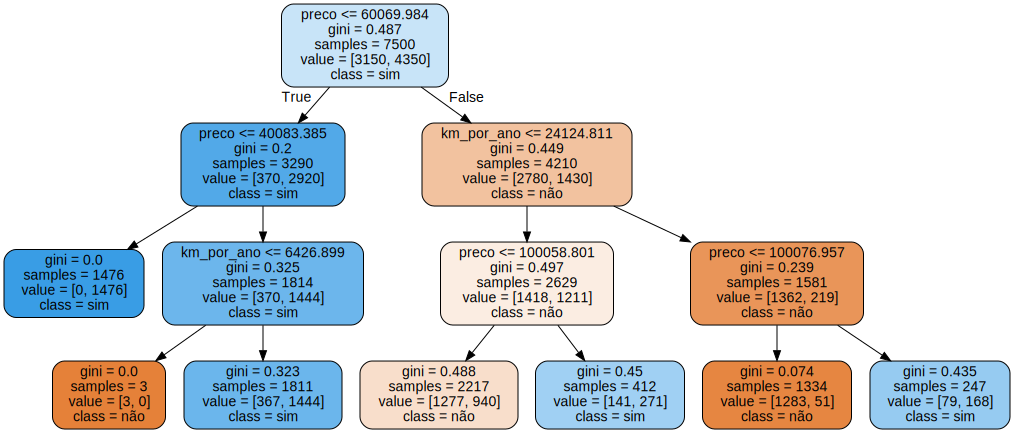

In [51]:
from sklearn.tree import export_graphviz
import graphviz

features = x.columns

dot_date = export_graphviz(
    modelo, feature_names=features,
    filled=True, rounded=True, class_names=['não','sim'])

grafico = graphviz.Source(dot_date)
grafico